In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder

In [ ]:
bc = load_breast_cancer()
dataset = pd.DataFrame(bc.data, columns=bc.feature_names)
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x_data = dataset[["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry",
                  "mean fractal dimension", "radius error", "texture error", "perimeter error", "area error", "smoothness error", "compactness error", "concavity error", 
                  "concave points error", "symmetry error", "fractal dimension error", "worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness", "worst compactness", "worst concavity",
                  "worst concave points", "worst symmetry", "worst fractal dimension"]]
y_data = bc["target"]
x_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
def pca_own_realization(X, n_components):
    # 1. Standardize the data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # 2. Compute the covariance matrix
    cov_mat = np.cov(X_std, rowvar=False)

    # 3. Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

    # 4. Sort the eigenvalues in decreasing order and choose the top k eigenvectors
    idx = np.argsort(eigenvalues)[::-1][:n_components]
    eigenvectors = eigenvectors[:, idx]

    # 5. Project the data onto the top k eigenvectors
    X_pca = np.dot(X_std, eigenvectors)

    # 7. Calculate explained_variance
    explained_variance = eigenvalues / np.sum(eigenvalues)

    return X_pca, explained_variance

In [ ]:
x_trans_data, ev = pca_own_realization(x_data, n_components=2)
x_trans_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
print(f"Explained Variance ratio for all dims: {ev}")
print(f"Explained Variance ratio: {ev[:2]}")

Explained Variance ratio for all dims: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 4.43482743e-06
 2.49601032e-05 5.29779290e-05 2.30015463e-04 2.72587995e-04
 5.16042379e-04 6.01833567e-04 8.11361259e-04 9.14646751e-04
 1.03864675e-03 9.99096464e-04]
Explained Variance ratio: [0.44272026 0.18971182]


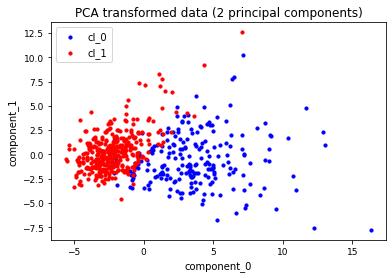

In [ ]:
vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']
count_clusters = 2
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)

plt.title('PCA transformed data (2 principal components)')

pten_cluster_entries_1 = []
for cl in range(count_clusters):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(count_clusters):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
bc = load_breast_cancer()
dataset = pd.DataFrame(bc.data, columns=bc.feature_names)
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x_data = dataset[["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry",
                  "mean fractal dimension", "radius error", "texture error", "perimeter error", "area error", "smoothness error", "compactness error", "concavity error", 
                  "concave points error", "symmetry error", "fractal dimension error", "worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness", "worst compactness", "worst concavity",
                  "worst concave points", "worst symmetry", "worst fractal dimension"]]
y_data = bc["target"]
x_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
sc = StandardScaler()
x_data = sc.fit_transform(x_data)

# warning DataFrame was converted to np.array
x_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
pca = PCA(n_components=2)
x_trans_data = pca.fit_transform(x_data)

print(f"Explained Variance ratio: {pca.explained_variance_ratio_}")
print(f"Explained Variance      : {pca.explained_variance_}")

Explained Variance ratio: [0.44272026 0.18971182]
Explained Variance      : [13.30499079  5.7013746 ]


In [ ]:
x_names = dataset.columns.tolist()
print(x_names)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [ ]:
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(bc.target)

In [ ]:
vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']


def draw_clusters(c_clusters, pten_cluster_entries, x_label_name, y_label_name, obj_ax, plot_number):
    obj_ax.subplot(2, 3, plot_number)
    for cl_inx in range(c_clusters):
        obj_ax.scatter(pten_cluster_entries[cl_inx][0], pten_cluster_entries[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
    obj_ax.legend(loc='upper left')
    obj_ax.xlabel(x_label_name)
    obj_ax.ylabel(y_label_name)
    obj_ax.tick_params(axis='both', which='major', labelsize=9)

<ipython-input-55-8956524844c4>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  obj_ax.subplot(2, 3, plot_number)


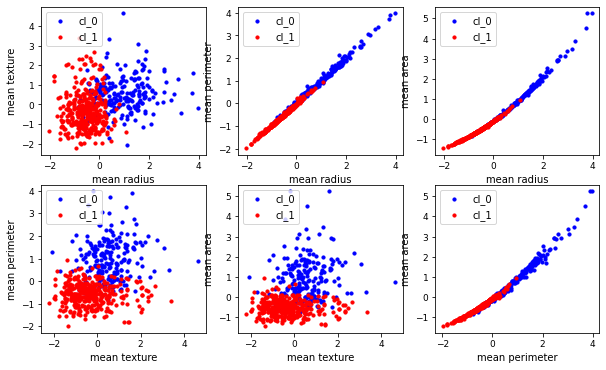

In [ ]:
count_clusters = 2

mat_axis = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 2),
    (1, 3),
    (2, 3)
]

plt.figure(figsize=(10, 6))
plt.title('Original Data printing different dims')

for i in range(len(mat_axis)):
    pten_cluster_entries_1 = []
    for cl in range(count_clusters):
        pvec_cluster_entries_axis_0 = []
        pvec_cluster_entries_axis_1 = []
        for en in range(len(x_data)):
            if cl == y_data[en]:
                pvec_cluster_entries_axis_0.append(x_data[en][mat_axis[i][0]])
                pvec_cluster_entries_axis_1.append(x_data[en][mat_axis[i][1]])
        pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

    draw_clusters(count_clusters, pten_cluster_entries_1,
                  x_names[mat_axis[i][0]], x_names[mat_axis[i][1]],
                  plt, i + 1)

plt.show()

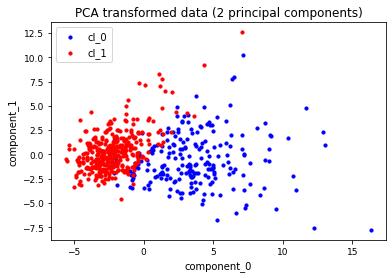

In [ ]:
plt.title('PCA transformed data (2 principal components)')

pten_cluster_entries_1 = []
for cl in range(count_clusters):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(count_clusters):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()